<a href="https://colab.research.google.com/github/zaedulislam/PyTorch_for_Deep_Learning_and_Computer_Vision/blob/main/Section%207%20-%20Image%20Recognition%20-%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 46. Image Transforms - Loading Images and Transforms | 48. Neural Network Validation

## Installation

In [50]:
!pip3 install torch
!pip3 install torchvision

# Alternatively, both packages can be installed in one line using the following command
# !pip3 install torch torchvision

## torchvision
The **torchvision** is a standard package that contains many types of datasets, most notably the enhanced image dataset and it also consists of transformations that are commonly applied to these images in order to preprocessed them before they are fed into a neural network.

In [51]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

Currently, [MNIST images](https://www.notion.so/islamzaedul/Section-7-Image-Recognition-PyTorch-2348e3c44df44cc4833575befa5f1259#545240f4a81f4518900c7c51cc5db4d9) are 28 by 28 greyscale images, which would imply that each image is a two dimensional numpy array. Twenty eight pixels wide and twenty eight pixels long, each pixel intensity ranging from 0 to 255.

We must transform this image from being an array to a tensor. The compose will allow to chain together transformations.



1. simply convert the numpy array in the range of 0 to 255 to a float tensor in the range from 0 to 1 encoded in a tensor shape which characterises the images channel height and weight (**C, H, W**) like [this](https://www.notion.so/islamzaedul/Section-7-Image-Recognition-PyTorch-2348e3c44df44cc4833575befa5f1259#6d9cc704476a4290a8795a5ce54cfe1e).

2. Apply the normalized transformation so transforms do normalize. We normalized the values for each transfer of image, size, channel height and width. The first set of brackets, we specified the mean that we would like to use to normalize all channels of the tensor image. In the second set of brackets, we specified the center deviation.

The reason why we chose **0.5** values for all of them is because ultimately we want to convert the tensor image range to go from 0, 1 to -1, -1. The way it does this is take, for example, the minimum value of zero by subtracting the mean and dividing by standard deviation, both of which are **0.5**, it yields a -1.

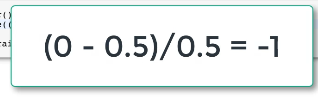

Doing the same thing for the maximum value yields a value of **1**, hence creating the range from **-1** to **1**.

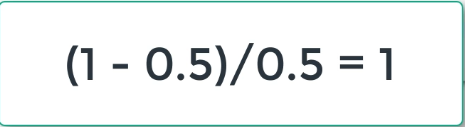

### Why would we want our image values to range from negative one to one?
In essence, normalization helps reduce Skewness and distortions within the data, ensuring a more effective learning process once that image data is fed into the neural network. Using this normalization with **0.5** values is one of many normalization schemas.




In [52]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
                                ])

## Dataset

**Arguments**

* `root='./data'` -> dataset will be saved in `data` directory
* `download=True` -> MNIST dataset will be downloaded in `data` folder
* `transform` -> The `transform` argument simply dictates any image manipulations applied to the images.

In [53]:
trainingDataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# This validation data set contains images just like the training sets, although generally the sample size is significantly smaller, 
# it tends to be 20 percent the size of the training data as we will use it mainly for testing purposes 
validationDataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

* Number of datapoints: 60000 - It provided us with 60000 training images

In [54]:
trainingDataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [55]:
validationDataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

The training loader is to specify the training batches training our neural network for every epoch (a single pass through the entire dataset). However, one epoch with 60000 training images would be too big to fit on the computer all at once. So we divide it in smaller batches using the train loader.

We choose a `batch_size` is equal to 100. It would take roughly 600 iterations to complete one epoch and that each iteration it'll update the weight of the neural network, minimizing the error, the `batch_size` really depends on the size of the data, according to the GPU, how long it takes to process your data.

### Why shuffle?
The advantage of being using gradient descent is to update the weight and the direction that decreases the error the most as it keeps minimizing the error Often times it will tend to get stuck in the **local minimum** rather than the **absolute minimum**. And the idea case is to do is always ensure the absolute minimum of the loss function to decrease the error as much as possible, thereby maximizing the accuracy of your model. Although when dealing with static training data that's unchanged overall training iterations, gradient descent algorithms will tend to get stuck in these **local minima**.

The solution to this is to **shuffle** your training data, ensuring that the subset of training that it changes with every single iteration.

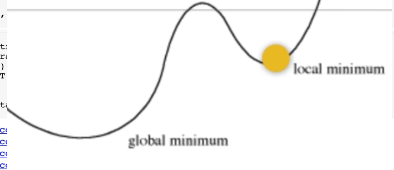

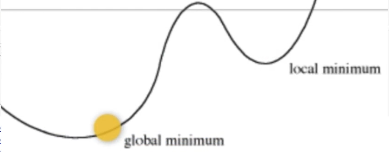

In [56]:
trainingLoader = torch.utils.data.DataLoader(dataset=trainingDataset, batch_size=100, shuffle=True)

We will not be training our validation data, and we will not be training our model based on the validation data. So there is no need to shuffle it.

In [57]:
validationLoader = torch.utils.data.DataLoader(validationDataset, batch_size = 100, shuffle = False)

## Analyze Image Dataset by Plotting
To plot the tensor image, it is required to change back to a numpy array.

 The converted numpy array has a shape where the first dimension now represents the **color channel**, the second and third dimensions represent the **width** and the **height** of the image and pixels. Ultimately, this dataset is a greyscale corresponding to a single color channel with a weight and height of   28 by 28 pixels. Hence the shape would be **1, 28, 28**. To plot our image, we require to have a **28, 28, 1** shape.

* `image = image.transpose(1, 2, 0)` - We swap axis 0 for axis 1, axis 1 for axis 2 and axis 0 in the end.

* `image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))` - Normalization process consists of subtracting the mean and dividing by the standard deviation. So to **denormalize** we would multiply by any standard deviation and add the mean.

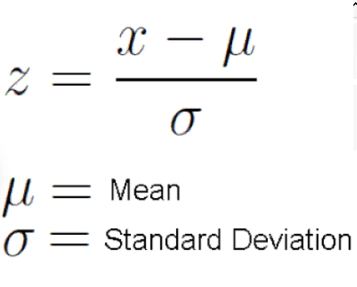

* `image.clip(0, 1)` - Finally, to ensure that the range is indeed between 0 1, apply the clip function to a minimum value of 0 and the maximum value of 1.

In [58]:
def imageConvertFromTensorToNumpy(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    print(image.shape)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


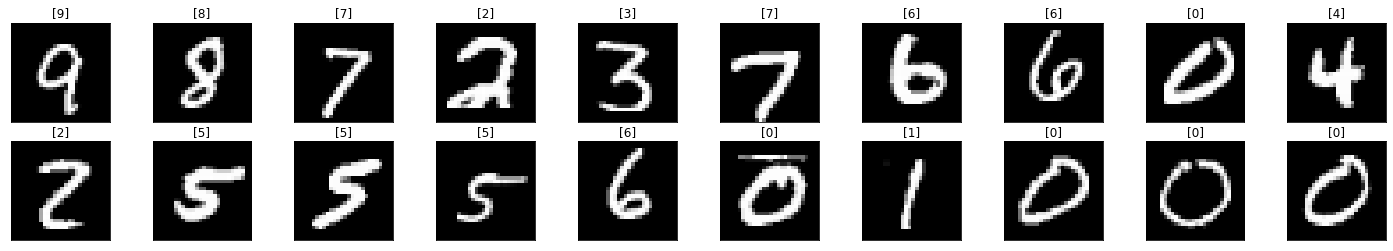

In [59]:
dataIter = iter(trainingLoader)
images, labels = dataIter.next()
figure = plt.figure(figsize=(25, 4))


for index in np.arange(20):
    # xticks=[], yticks=[] -> to remove horizontal and vertical tick marks
    ax = figure.add_subplot(2, 10, index + 1, xticks=[], yticks=[])
    plt.imshow(imageConvertFromTensorToNumpy(images[index]))
    ax.set_title([labels[index].item()])
    

# 47. Neural Network Implementation

Define a class named `Classifier` that will be using to create the neural model instances. And it will once again inherit from an `nn.Module`. We've defined the neural model in the constructor, **one input layer**, **two hidden layers** and **one output layer**.


### Why don't we use any activation function in **x = self.linear3(x)**?
By not applying an activation function, we would get back raw output of the network in the end. This is often called the **score**. This matters when calculating the **cross entropy** loss of a multiclass dataset, namely `nn.CrossEntropyLoss`. This loss function is used for multiclass classification. It is a combination of the log softmax and the negative log likelihood loss, 
`nn.CrossEntropyLoss = log_softmax + NLLLoss()`

In [60]:
class Classifier(nn.Module):
    def __init__(self, numberOfInputNodes, numberOfNodesInFirstHiddenLayer, numberOfNodesInSecondHiddenLayer, numberOfNodesInOuputLayer):
        super().__init__()
        # Initializing the input layer
        self.linear1 = nn.Linear(in_features = numberOfInputNodes, out_features = numberOfNodesInFirstHiddenLayer)
        # The second layer of nodes is the first hidden layer
        self.linear2 = nn.Linear(in_features = numberOfNodesInFirstHiddenLayer, out_features = numberOfNodesInSecondHiddenLayer)
        # The third layer of nodes is the second hidden layer
        self.linear3 = nn.Linear(in_features = numberOfNodesInSecondHiddenLayer, out_features = numberOfNodesInOuputLayer)

    def forward(self, x):
        # Essentially relu function, just like sigmoid, is an activation function. 
        # Except relu through empirical observation, generally performs better in most situations.
        x = F.relu(self.linear1(x))

        x = F.relu(self.linear2(x))

        # As we are dealing with a multi-class dataset, we will not apply any activation functions here such that what's returned is whatever value 
        # that's outputted by a linear3. We will be using "nn.CrossEntropyLoss" to compute the loss for our multiclass dataset, simply make sure that the outputs 
        # that are returned in the end is the output, the score such that no softmax activation function is being applied to it.
        x = self.linear3(x)

        # Return the final predicted value/score rather than a final probability
        return x


### Setting up a Model
According to the initialisation, we must set and put dimensions, hidden layer dimensions as well as output dimensions.
1. Since each image is **28x28**, 28 pixels traversing the horizontal axis and 28 pixels, traversing the vertical axis in total. This corresponds to **784** pixels that must be fed into the deep neural network.
2. The following neural network architecture to provide really good results, with **125** nodes in the first hidden layer and **65** nodes in the second hidden layer.
3. The output size simply corresponds to the number of classes in which each element can be classified. And since there are ten classes from **0 to 9**, we require **10** output nodes

In [61]:
model = Classifier(numberOfInputNodes = 784, numberOfNodesInFirstHiddenLayer = 125, numberOfNodesInSecondHiddenLayer = 65, numberOfNodesInOuputLayer = 10)
print(model)

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)


### Loss Function
1. **nn.CrossEntropyLoss()** function is used for multiclass classification.
2. Optimize the model parameters with a learning rate is equal to 0.0001, relatively low learning rate. A low learning rate can cause for the loss failure to get stuck in such a minima, whereas a higher learning rate's inherent, divergent behavior in that case would allow the parameters of the model to escape these local minimums, as our goal is generally to reach the absolute minimum of the loss function to minimize the loss as much as we can, while still generalising to new data and indication of getting stuck at a local minimum can be observed in the use of a low learning rate results any loss that stops decreasing at a relatively high value. In such a case, although it might seem counterintuitive, then increasing the learning rate would result in a better solution.

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

### Analyzing the Loss at Every Epoch with a Plot
* We start by iterating through every epoch. And for every epoch, we must iterate through every single training batch that's provided by the `trainingLoader`. So for each training batch will contain **100** images as well as one hundred labels
and train loader.
* The shape of each image tensor is **1X28X28**, **784** pixels in total. Due to the structure of the neural network, the input values are going to be multiplied by the weight matrix, connecting the input layer to the first hidden layer. To conduct this matrix multiplication, the images have to be one dimensional (i.e., **1x784**).

`inputs = inputs.view(inputs.shape[0], -1)`
* `inputs.shape[0]` -> We leave the colour channel and index is 0 as is. `-1`, by putting a negative one, it will simply infer the total the number of pixels. `inputs` will be fed into the model. 

In [63]:
epochs = 15

runningLossHistory = []
runningCorrectsHistory = []

validationRunningLossHistory = []
validationRunningCorrectsHistory = []

for epoch in range(epochs):

    # Keep track of the losses at every epoch 
    runningLoss = 0.0
    # Keep track of the corrects at every epoch 
    runningCorrects = 0.0

    validationRunningLoss = 0.0
    validationRunningCorrects = 0.0

    for inputs, labels in trainingLoader:
        # Flatten the batches of images by reshaping them with the familiar view method
        # 1 x 784
        inputs = inputs.view(inputs.shape[0], -1)
        
        # Calling upon the forward function which will end up returning the raw output/final score 
        # rather than a final probability to which a log softmax is then applied
        outputs = model(inputs)

        # Calculate the total categorical cross entropy loss. The output is ultimately compared with the actual labels
        # We are comparing the outputs and the labels and we determine the error based on the cross entropy criterion
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predictions = torch.max(outputs, 1)

        runningLoss += loss.item()
        runningCorrects += torch.sum(predictions == labels.data)
    else:
        with torch.no_grad(): # Temporarily set all the requires grad flags to be false, 
            # subsequently invoking this block of code as a pair, that was really the only difference.
            for validationInputs, validationLabels in validationLoader:
                validationInputs = validationInputs.view(validationInputs.shape[0], -1)
                validationOutputs = model(validationInputs)
                validationLoss = criterion(validationOutputs, validationLabels)

                _, validationPredictions = torch.max(validationOutputs, 1)

                validationRunningLoss += validationLoss.item()
                validationRunningCorrects += torch.sum(validationPredictions == validationLabels.data)


        
        # ******For Training Dataset******
        # Calculate the average loss for a epoch for training dataset
        epochLoss = runningLoss / len(trainingLoader)

        # Calculate the average loss for a epoch for training dataset
        epochAccuracy = runningCorrects.float() / len(trainingLoader)

        runningLossHistory.append(epochLoss)
        runningCorrectsHistory.append(epochAccuracy)


        # ******For Validation Dataset******
        # Calculate the average loss for a epoch for validation dataset
        validationEpochLoss = validationRunningLoss / len(validationLoader)

        # Calculate the average loss for a epoch for validation dataset
        validationEpochAccuracy = validationRunningCorrects.float() / len(validationLoader)

        validationRunningLossHistory.append(validationEpochLoss)
        validationRunningCorrectsHistory.append(validationEpochAccuracy)

        print("epoch : ", (epoch + 1))
        print("training loss: {:.4f}, training accuracy: {:.4f}".format(epochLoss, epochAccuracy.item()))
        print("validation loss: {:.4f}, validation accuracy: {:.4f}".format(validationEpochLoss, validationEpochAccuracy.item()))

epoch :  1
training loss: 0.9456, training accuracy: 77.1100
validation loss: 0.4271, validation accuracy: 88.8300
epoch :  2
training loss: 0.3820, training accuracy: 89.3683
validation loss: 0.3312, validation accuracy: 90.7600
epoch :  3
training loss: 0.3204, training accuracy: 90.7933
validation loss: 0.2892, validation accuracy: 91.7600
epoch :  4
training loss: 0.2885, training accuracy: 91.7233
validation loss: 0.2682, validation accuracy: 92.2900
epoch :  5
training loss: 0.2648, training accuracy: 92.3517
validation loss: 0.2445, validation accuracy: 92.9100
epoch :  6
training loss: 0.2430, training accuracy: 92.9567
validation loss: 0.2283, validation accuracy: 93.5300
epoch :  7
training loss: 0.2242, training accuracy: 93.5700
validation loss: 0.2140, validation accuracy: 93.8600
epoch :  8
training loss: 0.2076, training accuracy: 94.0450
validation loss: 0.1945, validation accuracy: 94.5000
epoch :  9
training loss: 0.1919, training accuracy: 94.5050
validation loss: 0.

## Visualization

### When learning rate is 0.01

### Training Loss
Although it seems to minimize as the epochs progress to a final value of zero point one five. There is one problem that can be clearly seen that the loss kind of fluctuates as the epochs progress.

Recall the concept of gradient descent, which gradually adjusts the parameters of your model in the direction of the least error. The steps that it takes to arrive to optimal parameters is dictated by the learning rate.

If the learning rate is too high, the steps it takes will be too large, such that the parameters will, in a way flip flop back and forth between points, overshooting the minimum and thus leading to divergent classes.

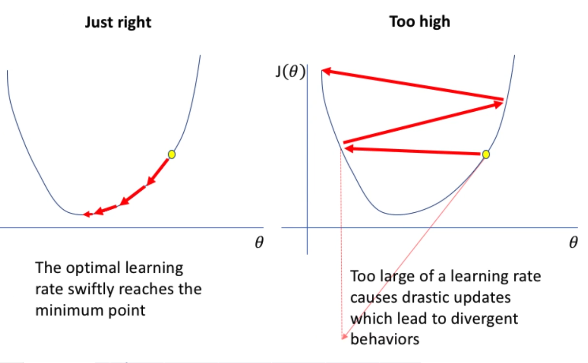

In [ ]:
print(runningLossHistory)
plt.plot(runningLossHistory, label = 'training loss')

#### Training Accuracy

In [ ]:
print(runningCorrectsHistory)
plt.plot(runningCorrectsHistory, label = 'training accuracy')

### When learning rate is 0.0001
Here, we can see a much smoother training process, it seems that as the epochs progress, the loss continuously decreases. It's not flip flopping back and forth. Had we specified more epochs, it seems that the loss would have still continued to decrease. So we see a much smoother learning process with a fairly reasonable accuracy if we plot the loss.

#### Training Loss & Validation Loss
It's a consistent decrease in running loss history.

Running Loss History:  [0.9455588017900785, 0.3820383461813132, 0.3203781942774852, 0.2884891900792718, 0.26481643587350845, 0.24304886976877849, 0.22416705482949814, 0.20758939144512017, 0.19194534834474325, 0.17969082502027353, 0.16811889971916874, 0.15757126456747453, 0.14837579030233125, 0.1395638849151631, 0.13182698985872168]
Validation Running Loss History:  [0.4271147221326828, 0.33118689343333246, 0.2892081716097891, 0.26820641219615937, 0.24453427429310978, 0.22833441592752934, 0.21404639963060618, 0.19445346974767744, 0.18433489494025707, 0.1738667043298483, 0.16062021402176468, 0.16131537273991853, 0.14677729973569512, 0.14158340248279275, 0.13977955553447827]


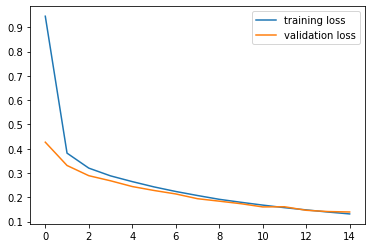

In [68]:
print("Running Loss History: ", runningLossHistory)
print("Validation Running Loss History: ", validationRunningLossHistory)
plt.plot(runningLossHistory, label = 'training loss')
plt.plot(validationRunningLossHistory, label = 'validation loss')
plt.legend()

#### Training Accuracy
It's also a consistent increase in performance and a reasonable accuracy in the model.

Running Corrects History:  [tensor(77.1100), tensor(89.3683), tensor(90.7933), tensor(91.7233), tensor(92.3517), tensor(92.9567), tensor(93.5700), tensor(94.0450), tensor(94.5050), tensor(94.8033), tensor(95.2050), tensor(95.4700), tensor(95.7167), tensor(95.9967), tensor(96.2117)]
Validation Running Corrects History:  [tensor(88.8300), tensor(90.7600), tensor(91.7600), tensor(92.2900), tensor(92.9100), tensor(93.5300), tensor(93.8600), tensor(94.5000), tensor(94.7900), tensor(95.0900), tensor(95.3600), tensor(95.3900), tensor(95.5800), tensor(95.7700), tensor(95.8800)]


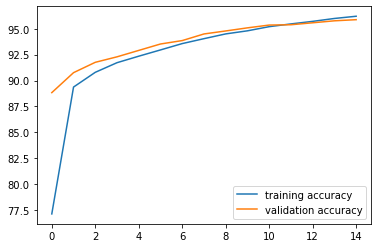

In [72]:
print("Running Corrects History: ", runningCorrectsHistory)
print("Validation Running Corrects History: ", validationRunningCorrectsHistory)
plt.plot(runningCorrectsHistory, label = 'training accuracy')
plt.plot(validationRunningCorrectsHistory, label = 'validation accuracy')
plt.legend()